## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
print(mouse_metadata.count())
print(study_results.count())
print(mouse_results_df.count())
mouse_results_df.head()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64
Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Create DataFrame that return max Timepoint per mice (by ID number) that shows up for Mouse ID and Timepoint. 
mouse_group = mouse_results_df.groupby(["Mouse ID"])
max_mouse = mouse_group.max()
max_result_df = max_mouse.reset_index()

max_result_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
max_result_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
print(max_result_df["Mouse ID"].count())

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_tumor_by_regimen_df = max_result_df[['Drug Regimen','Tumor Volume (mm3)']]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stat_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").describe()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").mean()
median_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").median()
var_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").var()
std_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").std()
sem_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").sem()

# Assemble the resulting series into a single summary dataframe.
sum_stats_by_regimen_df = pd.DataFrame({"Mean":mean_by_regimen['Tumor Volume (mm3)'],
                                        "Median":median_by_regimen['Tumor Volume (mm3)'],
                                        "Variance":var_by_regimen['Tumor Volume (mm3)'],
                                        "Std Dev":std_by_regimen['Tumor Volume (mm3)'],
                                        "SEM":sem_by_regimen['Tumor Volume (mm3)']}).reset_index()



In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stats_by_regimen_df

# Using the aggregation method, produce the same summary statistics in a single line
#???? Don't understand directions, not required?????
#agg_df = sum_stats_by_regimen_df.agg(['mean'])
#agg_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


## Bar and Pie Charts

<IPython.core.display.Javascript object>


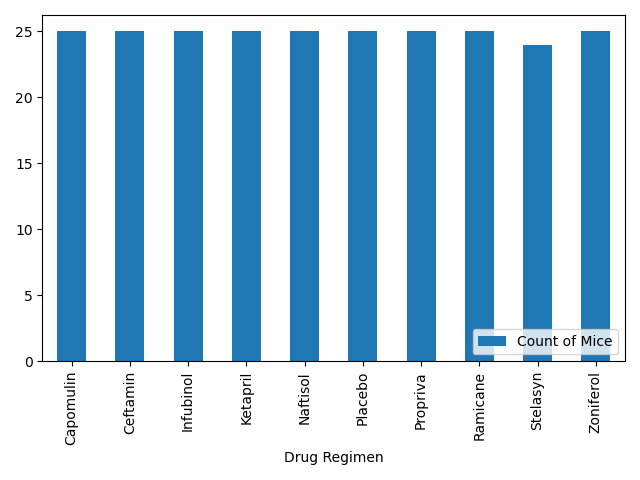

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").count().reset_index()
count_by_regimen = count_by_regimen.rename(columns={'Tumor Volume (mm3)':'Count of Mice'})
x_axis = np.arange(len(count_by_regimen))

count_by_regimen.plot(kind='bar',x= "Drug Regimen",y= 'Count of Mice').legend(loc='lower right')
plt.tight_layout()

<IPython.core.display.Javascript object>


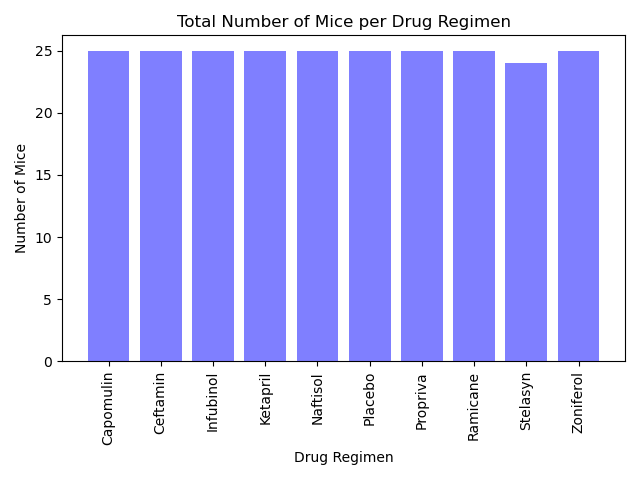

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure()
plt.bar(x_axis,count_by_regimen['Count of Mice'],color='b', alpha=0.5, align="center",)

#Format bar chart
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_by_regimen['Drug Regimen'], rotation="vertical")

plt.title("Total Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()


<IPython.core.display.Javascript object>


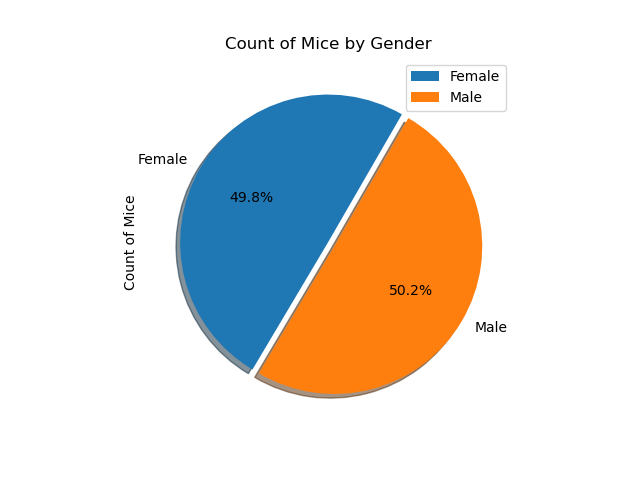

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
max_result_df.groupby('Sex').count()

count_by_gender_df = max_result_df.groupby('Sex').count()
count_by_gender_df = count_by_gender_df.rename(columns={'Mouse ID':'Count of Mice'})

plot = count_by_gender_df.plot.pie(y='Count of Mice',title="Count of Mice by Gender",shadow=True,explode=(0,0.05), autopct='%1.1f%%',startangle=60)


In [128]:
count_by_gender_df

,Count of Mice,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,124,124,124,124,124,124
Male,125,125,125,125,125,125,125


<IPython.core.display.Javascript object>


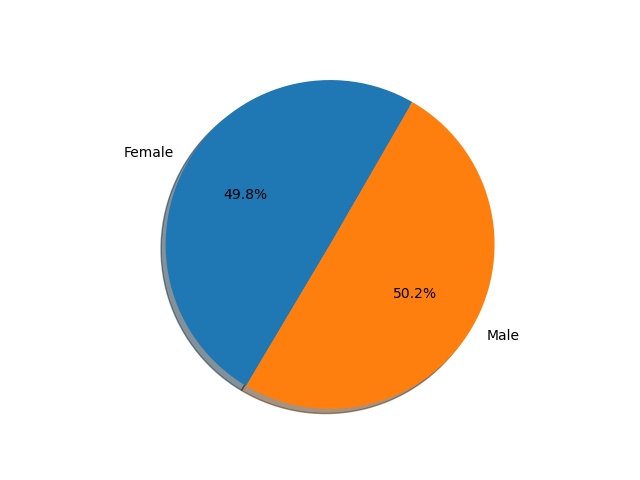

(-1.1363945486299152,
 1.1107890243102891,
 -1.1107384971528116,
 1.1364102050541767)

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()

plt.pie(count_by_gender_df['Count of Mice'],labels=count_by_gender_df.index,shadow=True,autopct='%1.1f%%',startangle=60)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
